# Final Project by saket k

## implementing a machine learning algorithm to predict customer churn of a bank

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the Dataset

In [2]:
ds = pd.read_csv("churn_prediction.csv")

## displaying the first 5 rows of Dataset

In [3]:
ds.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


## displaying detailed statistics of Dataset

In [4]:
ds.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [5]:
ds["current_balance"][ds["current_balance"] <= 0]

1375    -5213.02
1976    -3786.47
3426    -1718.82
5383      -91.63
7779       -1.20
11833   -2287.98
12608   -5503.96
16971    -759.48
18657   -3244.36
20083    -712.24
21401   -1357.86
22095    -676.16
22546   -4570.80
23414    -475.56
24010   -2242.98
27715    -367.52
28336   -1149.80
Name: current_balance, dtype: float64

In [6]:
ds["current_balance"].value_counts()

1429.07     6
1428.73     5
1429.14     4
1428.79     4
1428.94     4
           ..
970.41      1
7707.93     1
10931.00    1
6091.23     1
7.50        1
Name: current_balance, Length: 27903, dtype: int64

In [7]:
def func3(x):
    if x["current_balance"] < 0 :
        return ((x["current_balance"]) * -1)
    else:
        return (x["current_balance"])

In [8]:
def func4(x):
    if x["previous_month_end_balance"] < 0 :
        return ((x["previous_month_end_balance"]) * -1)
    else:
        return (x["previous_month_end_balance"])

In [9]:
def func5(x):
    if x["average_monthly_balance_prevQ2"] < 0 :
        return ((x["average_monthly_balance_prevQ2"]) * -1)
    else:
        return (x["average_monthly_balance_prevQ2"])

In [10]:
def func6(x):
    if x["current_month_balance"] < 0 :
        return ((x["current_month_balance"]) * -1)
    else:
        return (x["current_month_balance"])

In [11]:
def func7(x):
    if x["previous_month_balance"] < 0 :
        return ((x["previous_month_balance"]) * -1)
    else:
        return (x["previous_month_balance"])

In [12]:
ds["current_balance"] = ds.apply(lambda x : func3(x) , axis = 1)

In [13]:
ds["previous_month_end_balance"] = ds.apply(lambda x : func4(x) , axis = 1)

In [14]:
ds["average_monthly_balance_prevQ2"] = ds.apply(lambda x : func5(x) , axis = 1)

In [15]:
ds["current_month_balance"] = ds.apply(lambda x : func6(x) , axis = 1)

In [16]:
ds["previous_month_balance"] = ds.apply(lambda x : func7(x) , axis = 1)

<AxesSubplot:xlabel='customer_nw_category,churn'>

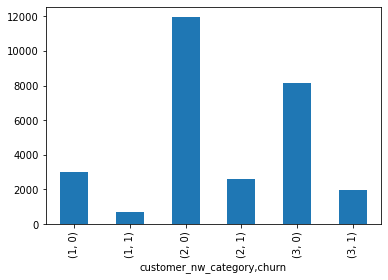

In [17]:
ds.groupby(["customer_nw_category"])["churn"].value_counts().plot(kind = "bar")

In [18]:
temp = pd.DataFrame(index=ds.columns)
temp['unique'] = ds.nunique()
temp['data type'] = ds.dtypes
temp["missing"] = ds.isnull().sum()
temp


,unique,data type,missing
customer_id,28382,int64,0
vintage,5473,int64,0
age,90,int64,0
gender,2,object,525
dependents,15,float64,2463
occupation,5,object,80
city,1604,float64,803
customer_nw_category,3,int64,0
branch_code,3185,int64,0
days_since_last_transaction,360,float64,3223


In [19]:
ds.nunique()

customer_id                       28382
vintage                            5473
age                                  90
gender                                2
dependents                           15
occupation                            5
city                               1604
customer_nw_category                  3
branch_code                        3185
days_since_last_transaction         360
current_balance                   27900
previous_month_end_balance        27921
average_monthly_balance_prevQ     27801
average_monthly_balance_prevQ2    27940
current_month_credit              10411
previous_month_credit             10711
current_month_debit               13704
previous_month_debit              14010
current_month_balance             27944
previous_month_balance            27913
churn                                 2
dtype: int64

In [20]:
ds.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

<AxesSubplot:xlabel='churn'>

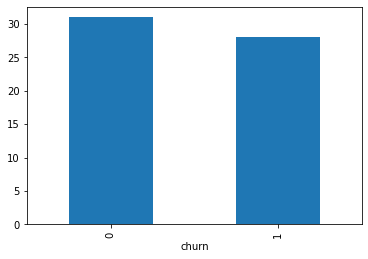

In [21]:
ds.groupby(["churn"])["days_since_last_transaction"].median().plot(kind = "bar")

In [22]:
bins = [0,18,55,80,90]
gp = [0,1,2,3]
ds["age_bracket"] = pd.cut(ds["age"], bins , labels = gp)
ds["age_bracket"].head()

0    2
1    1
2    1
3    3
4    1
Name: age_bracket, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [23]:
ds["customer_nw_category"].value_counts()

2    14559
3    10112
1     3711
Name: customer_nw_category, dtype: int64

In [24]:
ds.groupby(["age_bracket"])["occupation"].value_counts()

age_bracket  occupation   
0            student            805
             self_employed       56
             salaried            12
             company              1
1            self_employed    11588
             salaried          5440
             student           1251
             retired             27
             company             13
2            self_employed     4721
             retired           1681
             salaried          1235
             company              5
             student              2
3            self_employed     1111
             retired            316
             company             21
             salaried            17
Name: occupation, dtype: int64

In [25]:
def funcocc(x):
    if x["age_bracket"] == 3:
        return "self_employed"
    elif x["age_bracket"] == 2:
        return "self_employed"
    elif x["age_bracket"] == 1:
        return "self_employed"
    elif x["age_bracket"] == 0:
        return "student"

In [26]:
ds["occupation"] = ds.apply(lambda x : funcocc(x) if pd.isnull(x["occupation"]) == True else x["occupation"], axis = 1)

In [27]:
ds["dependents"].fillna(value = (ds["dependents"].mode()[0]), inplace = True)

In [28]:
ds["dependents"].replace({36.0 : 10.0,52.0 : 10.0,25.0 : 10.0,50.0 : 10.0,32.0 : 10.0}, inplace = True)

In [29]:
ds = ds.astype({"churn" : "object", "dependents" : "int64","customer_nw_category" : "object"})

In [30]:
ds.groupby(["occupation"])["churn"].value_counts()

occupation     churn
company        0           36
               1            4
retired        0         1719
               1          305
salaried       0         5557
               1         1147
self_employed  0        14076
               1         3480
student        0         1734
               1          324
Name: churn, dtype: int64

In [31]:
ds["gender"].fillna(value = "Male", inplace = True)

In [32]:
ds["current_balance"].loc[ds["churn"] == 1]

3         2291.91
4          927.72
12         554.38
14        5431.42
16        1448.49
           ...   
28368      323.71
28372      197.83
28374     7713.88
28379    65511.97
28381     2107.05
Name: current_balance, Length: 5260, dtype: float64

In [33]:
ds["gender"].value_counts()

Male      17073
Female    11309
Name: gender, dtype: int64

In [34]:
ds["gender"].isnull().sum()

0

In [35]:
ds["city"].mode()[0]

1020.0

In [36]:
ds["city"].fillna(value = (ds['city'].mode()[0]), inplace = True)

In [37]:
temp3 =  ds["city"].value_counts()

In [38]:
ds['city_count'] = ds['city'].apply(lambda x: temp3[x])
ds[['city_count','city']].head()

,city_count,city
0,18,187.0
1,4282,1020.0
2,1291,146.0
3,4282,1020.0
4,289,1494.0


In [39]:
ds["city"].value_counts().sort_values(ascending=False).head(20)

1020.0    4282
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
334.0      930
1232.0     840
623.0      778
15.0       669
575.0      631
1525.0     375
905.0      345
491.0      312
1111.0     312
1494.0     289
649.0      281
1589.0     251
318.0      245
1084.0     240
61.0       237
Name: city, dtype: int64

In [40]:
ds.loc[ds["city_count"] <= 500 ]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,age_bracket,city_count
0,1,3135,66,Male,0,self_employed,187.0,2,755,224.0,...,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2,18
4,6,2531,42,Male,2,self_employed,1494.0,3,388,58.0,...,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,1,289
12,14,2438,73,Male,0,retired,44.0,3,409,47.0,...,137.25,0.33,500.33,5098.90,508.53,2541.22,2612.60,1,2,19
14,16,2314,48,Female,0,self_employed,665.0,2,569,52.0,...,7720.34,0.66,661.73,0.66,2811.53,5437.04,6633.94,1,1,97
16,19,2723,49,Male,0,self_employed,1125.0,3,1023,0.0,...,1710.93,190.71,113.64,2461.66,1257.41,1950.95,3127.00,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28373,30293,2384,73,Male,0,retired,1381.0,3,790,3.0,...,1973.16,2514.47,433.49,1039.76,180.37,1410.80,1800.70,0,2,24
28374,30294,658,55,Male,0,salaried,1076.0,3,463,306.0,...,7670.06,0.33,0.33,0.33,0.33,7713.88,7713.88,1,1,133
28376,30296,2155,85,Male,0,retired,1589.0,2,389,NaN,...,1730.46,0.04,0.04,0.04,0.04,1741.50,1741.50,0,3,251
28378,30298,4919,34,Female,0,self_employed,1046.0,2,223,14.0,...,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,1,81


In [41]:
for i in range(0, len(ds)):
    if ds['city_count'][i] < 500 :
        ds['city'][i] = 70

<ipython-input-41-e7f56dd9c0b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['city'][i] = 70


In [42]:
ds["city"].nunique()

11

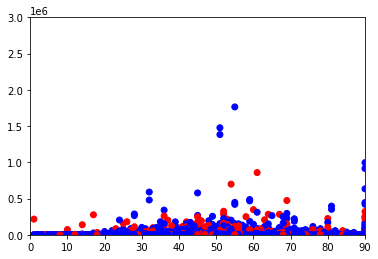

In [43]:
fig, ax = plt.subplots()
colors = {1:'red', 0:'blue',}
ax.scatter(ds['age'], ds['current_month_credit'], c=ds['churn'].apply(lambda x: colors[x]))
ax.set_xlim((0, 90))
ax.set_ylim((0 , 0.3e7))
plt.show()

<AxesSubplot:xlabel='age_bracket'>

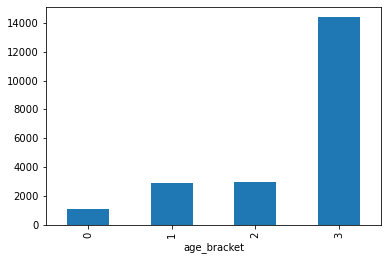

In [44]:
ds.groupby(["age_bracket"])['current_month_credit'].mean().plot(kind = "bar")

<AxesSubplot:xlabel='age_bracket'>

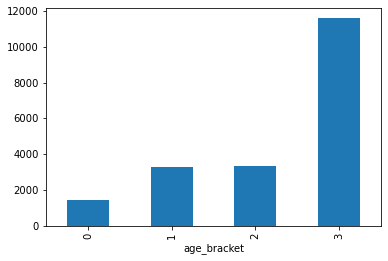

In [45]:
ds.groupby(["age_bracket"])['current_month_debit'].mean().plot(kind = "bar")

<AxesSubplot:xlabel='age_bracket'>

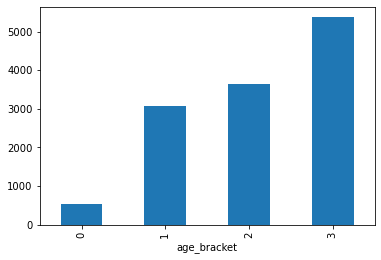

In [46]:
ds.groupby(["age_bracket"])['previous_month_credit'].mean().plot(kind = "bar")

<AxesSubplot:xlabel='age_bracket'>

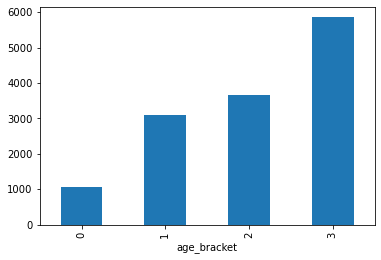

In [47]:
ds.groupby(["age_bracket"])['previous_month_debit'].mean().plot(kind = "bar")

<AxesSubplot:ylabel='Frequency'>

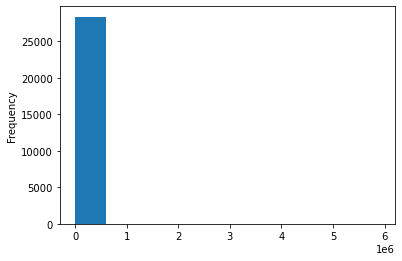

In [48]:
ds['current_balance'].plot.hist()

In [49]:
ds.loc[ds["current_balance"] >= 1e6]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,age_bracket,city_count
9908,10575,1670,90,Male,0,self_employed,70.0,2,2542,18.0,...,5010170.10,5232.34,1452.87,17327.27,17248.30,5778184.77,5720144.50,0,3,68
12712,13575,2418,73,Female,0,self_employed,834.0,2,469,0.0,...,251523.86,57143.49,102.81,215561.70,568052.57,1001725.71,1326486.64,0,2,1138
19977,21317,842,1,Male,0,self_employed,70.0,2,650,18.0,...,581507.67,216396.14,143980.87,141428.59,571428.59,1074624.64,663884.48,1,0,1
23211,24764,2560,90,Male,0,self_employed,70.0,2,138,108.0,...,757872.97,0.56,0.56,240137.37,95975.76,1284357.61,1572832.93,1,3,63
23247,24807,1732,90,Male,0,self_employed,70.0,2,150,NaN,...,1389626.93,0.31,0.31,0.31,0.31,1398486.42,1398486.42,0,3,66
27856,29735,194,90,Male,0,self_employed,70.0,1,296,213.0,...,413107.52,0.24,0.24,0.24,0.24,1435872.80,1435872.80,0,3,187


<AxesSubplot:ylabel='Frequency'>

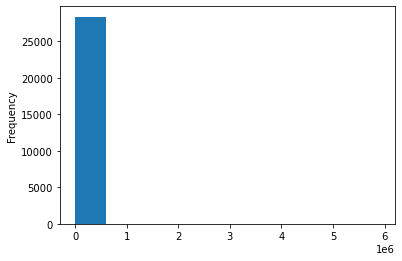

In [50]:
ds['current_balance'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

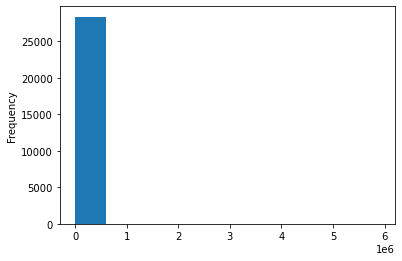

In [51]:
ds['current_balance'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

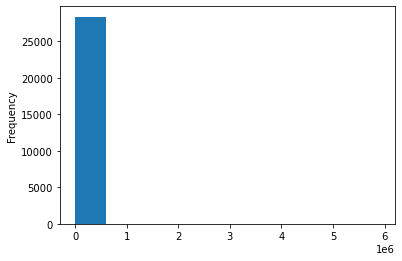

In [52]:
ds['current_balance'].plot.hist()

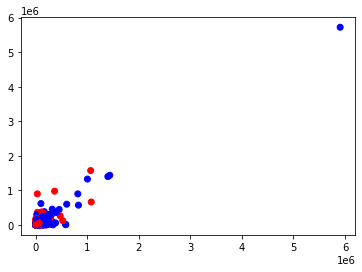

In [53]:
fig, ax = plt.subplots()
colors = {1:'red', 0:'blue',}
ax.scatter(ds['current_balance'], ds['previous_month_balance'], c=ds['churn'].apply(lambda x: colors[x]))
plt.show()

In [54]:
ds["change_monthly_balance"] = ds["previous_month_balance"] - ds["current_month_balance"]

In [55]:
ds["change_Q_balance"] = ds["average_monthly_balance_prevQ2"] - ds['average_monthly_balance_prevQ']

In [56]:
# function which calculates downward trend in bank balance
def func1(x):
    if (x["change_monthly_balance"] >= x["current_month_balance"]):
        return 1
    else:
        return 0

In [57]:
# function which calculates downward trend in bank balance
def func2(x):
    if (x["change_Q_balance"] >= x["current_month_balance"]):
        return 1
    else:
        return 0

In [58]:
ds["possible_churn"] = ds.apply(lambda x : func1(x) , axis = 1)

In [59]:
ds.drop_duplicates( subset = ["customer_id"]).shape

(28382, 26)

In [60]:
ds.groupby(["possible_churn"])["churn"].value_counts()

possible_churn  churn
0               0        22243
                1         3643
1               1         1617
                0          879
Name: churn, dtype: int64

In [61]:
categ_ds =ds.filter(["city","dependents","gender","occupation","customer_nw_category","churn","possible_churn","age_bracket"], axis = 1)

In [62]:
conti_ds = ds.drop(["city","dependents","gender","occupation","customer_nw_category","churn","possible_churn","age_bracket","customer_id","branch_code"], axis = 1)

In [63]:
conti_ds = conti_ds.drop(["days_since_last_transaction"], axis = 1)

In [64]:
conti_ds.columns

Index(['vintage', 'age', 'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'city_count', 'change_monthly_balance',
       'change_Q_balance'],
      dtype='object')

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(conti_ds)
scaled_data = pd.DataFrame(scaled_data  ,  columns=['vintage', 'age', 'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'city_count', 'change_monthly_balance',
       'change_Q_balance'])
scaled_data.head()

,vintage,age,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,city_count,change_monthly_balance,change_Q_balance
0,0.232330,0.730337,0.000247,0.000254,0.000005,0.000289,1.548512e-08,8.044683e-08,2.487609e-08,1.343546e-07,0.000252,0.000255,0.003971,0.367161,0.192999
1,0.010221,0.382022,0.000913,0.001516,0.001118,0.002479,4.482534e-08,2.328724e-07,7.182983e-04,7.110188e-05,0.001124,0.001536,1.000000,0.368808,0.193873
2,0.171083,0.337079,0.000663,0.001013,0.000611,0.000562,4.890037e-08,2.540426e-07,7.916775e-04,1.833021e-04,0.000866,0.000886,0.301331,0.367207,0.192606
3,0.023430,1.000000,0.000388,0.000399,0.000115,0.000201,3.749028e-08,1.947660e-07,6.022631e-08,1.515605e-03,0.000397,0.000292,1.000000,0.366714,0.192798
4,0.184842,0.460674,0.000157,0.000244,0.000038,0.000373,2.608020e-08,3.025648e-04,7.706481e-05,1.087601e-03,0.000200,0.000293,0.067274,0.367535,0.193044


In [67]:
one_city = pd.get_dummies(categ_ds["city"])
one_city

,15.0,70.0,146.0,334.0,409.0,575.0,623.0,834.0,1020.0,1096.0,1232.0
0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
28377,0,0,0,0,0,0,0,0,1,0,0
28378,0,1,0,0,0,0,0,0,0,0,0
28379,0,0,0,0,0,0,0,0,0,1,0
28380,0,1,0,0,0,0,0,0,0,0,0


In [68]:
one_dependents = pd.get_dummies(categ_ds["dependents"])
one_dependents

,0,1,2,3,4,5,6,7,8,9,10
0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
28377,1,0,0,0,0,0,0,0,0,0,0
28378,1,0,0,0,0,0,0,0,0,0,0
28379,1,0,0,0,0,0,0,0,0,0,0
28380,0,0,0,1,0,0,0,0,0,0,0


In [69]:
one_gender = pd.get_dummies(categ_ds["gender"])
one_gender

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
28377,1,0
28378,1,0
28379,0,1
28380,0,1


In [70]:
one_occupation = pd.get_dummies(categ_ds["occupation"])
one_occupation

,company,retired,salaried,self_employed,student
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
28377,0,0,0,0,1
28378,0,0,0,1,0
28379,0,0,1,0,0
28380,0,0,0,1,0


In [71]:
categ_ds =ds.filter(["customer_nw_category","churn","possible_churn","age_bracket"], axis = 1)
categ_ds

,customer_nw_category,churn,possible_churn,age_bracket
0,2,0,0,2
1,2,0,0,1
2,2,0,0,1
3,2,1,0,3
4,3,1,0,1
...,...,...,...,...
28377,2,0,0,0
28378,2,0,0,1
28379,2,1,0,1
28380,3,0,0,1


In [72]:
categ_ds_2 = pd.concat([categ_ds,one_occupation,one_gender,one_dependents,one_city], axis = 1)

In [73]:
categ_ds_2

,customer_nw_category,churn,possible_churn,age_bracket,company,retired,salaried,self_employed,student,Female,...,70.0,146.0,334.0,409.0,575.0,623.0,834.0,1020.0,1096.0,1232.0
0,2,0,0,2,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2,1,0,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3,1,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,2,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
28378,2,0,0,1,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
28379,2,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
28380,3,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [74]:
ds2 = pd.concat([categ_ds_2,scaled_data], axis = 1)
ds2

,customer_nw_category,churn,possible_churn,age_bracket,company,retired,salaried,self_employed,student,Female,...,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,city_count,change_monthly_balance,change_Q_balance
0,2,0,0,2,0,0,0,1,0,0,...,0.000289,1.548512e-08,8.044683e-08,2.487609e-08,1.343546e-07,0.000252,0.000255,0.003971,0.367161,0.192999
1,2,0,0,1,0,0,0,1,0,0,...,0.002479,4.482534e-08,2.328724e-07,7.182983e-04,7.110188e-05,0.001124,0.001536,1.000000,0.368808,0.193873
2,2,0,0,1,0,0,1,0,0,0,...,0.000562,4.890037e-08,2.540426e-07,7.916775e-04,1.833021e-04,0.000866,0.000886,0.301331,0.367207,0.192606
3,2,1,0,3,0,0,0,1,0,0,...,0.000201,3.749028e-08,1.947660e-07,6.022631e-08,1.515605e-03,0.000397,0.000292,1.000000,0.366714,0.192798
4,3,1,0,1,0,0,0,1,0,0,...,0.000373,2.608020e-08,3.025648e-04,7.706481e-05,1.087601e-03,0.000200,0.000293,0.067274,0.367535,0.193044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,2,0,0,0,0,0,0,0,1,1,...,0.000556,2.363518e-08,1.227873e-07,3.796876e-08,2.050676e-07,0.000186,0.000188,1.000000,0.367161,0.193097
28378,2,0,0,1,0,0,0,1,0,1,...,0.000772,1.385511e-07,9.653620e-07,1.179637e-04,7.170718e-04,0.000647,0.000645,0.018687,0.367126,0.193038
28379,2,1,0,1,0,0,1,0,0,0,...,0.004376,3.803495e-04,1.644100e-03,2.202450e-05,5.076483e-05,0.010571,0.010063,0.470684,0.364634,0.187053
28380,3,0,0,1,0,0,0,1,0,0,...,0.000371,1.548512e-08,8.044683e-08,2.487609e-08,1.343546e-07,0.000281,0.000284,0.003270,0.367161,0.193034


In [75]:
ds2.dtypes
ds2 = ds2.astype({"customer_nw_category":"int","churn":"int","age_bracket":"int"})

In [76]:
ds2["age_bracket"]

0        2
1        1
2        1
3        3
4        1
        ..
28377    0
28378    1
28379    1
28380    1
28381    0
Name: age_bracket, Length: 28382, dtype: int32

In [77]:
#seperating independent and dependent variables
x = ds2.drop(['churn'], axis=1)
y = ds2['churn']
x.shape, y.shape

((28382, 47), (28382,))

In [78]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56, stratify=y)

###   implementing K Nearest Neighbour Classifier Algorithm

In [79]:
#importing KNN classifier and metric F1score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [80]:
# Creating instance of KNN
clf = KNN(n_neighbors = 10)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 Score    ', k )

Test F1 Score     0.25561097256857856


In [81]:
def Elbow(K):
    #initiating empty list
    test_error = []
   
    #training model for evey value of K
    for i in K:
        #Instance oh KNN
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp,test_y)
        error = 1-tmp
        test_error.append(error)
    
    return test_error

In [82]:
#Defining K range
k = range(1, 50, 5)

In [83]:
# calling above defined function
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

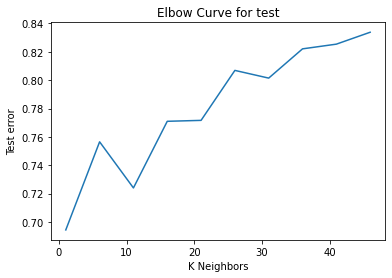

In [84]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

In [85]:
# Creating instance of KNN
clf = KNN(n_neighbors = 1)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict1 = clf.predict(test_x)
k = f1_score(test_predict1, test_y)
print('Test F1 Score    ', k )

Test F1 Score     0.3055881203595154


###   implementing Logistic Regression Algorithm

In [86]:
from sklearn.linear_model import LogisticRegression as Lr
from sklearn.metrics import f1_score

In [87]:
lr = Lr()
lr.fit(train_x,train_y)

c:\users\k1035\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [88]:
train_predict = lr.predict(train_x)
train_predict

array([0, 0, 0, ..., 0, 0, 0])

In [89]:
# Calculating f1-score
k = f1_score(train_predict, train_y)
print('Training f1_score', k )

Training f1_score 0.40935064935064935


In [90]:
# Predicting over the Test Set and f1-score
test_predict2 = lr.predict(test_x)
k = f1_score(test_predict2, test_y)
print('Test f1_score    ', k )

Test f1_score     0.4271744724652599


###   implementing Decision Tree Classifier Algorithm

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
model3 = DecisionTreeClassifier(max_depth=7)
model3.fit(train_x,train_y)
pred3=model3.predict(test_x)

###   implementing ensemble techniques 

In [94]:
from statistics import mode
final_pred = np.array([])
for i in range(0,len(test_x)):
    final_pred = np.append(final_pred, mode([test_predict1[i], test_predict2[i], pred3[i]]))

In [95]:
final_pred

array([0., 0., 0., ..., 1., 0., 0.])

In [96]:
from sklearn.metrics import accuracy_score

In [97]:
accuracy_score(test_y, final_pred)

0.8448421645997746